In [12]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
drug_data = pd.read_csv('/content/drive/Shareddrives/CMPE255/drug_data.csv')

In [15]:
!pip install autoviml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
drug_data.head(5)

,Unnamed: 0,CASEID,DRUGID_1,CATID_1_1,CATID_2_1,CATID_3_1,ROUTE_1,TOXTEST_1,sdled_1_1,sdled_2_1,sdled_3_1,sdled_4_1,sdled_5_1,sdled_6_1,DRUGID_2,CATID_1_2,CATID_2_2,CATID_3_2,ROUTE_2,TOXTEST_2,sdled_1_2,sdled_2_2,sdled_3_2,sdled_4_2,sdled_5_2,sdled_6_2,DRUGID_3,CATID_1_3,CATID_2_3,CATID_3_3,ROUTE_3,TOXTEST_3,sdled_1_3,sdled_2_3,sdled_3_3,sdled_4_3,sdled_5_3,sdled_6_3,ALCOHOL,NONALCILL,PHARMA,NONMEDPHARMA,CASEWGT,YEAR,QUARTER,DAYPART,NUMSUBS,CASETYPE,DISPOSITION,ALLABUSE,METRO,AGECAT,SEX,RACE
0,0,1,865,105,110,2005,1,2,1,2.00,-7.00,-7.00,-7.00,-7.00,1255,105,114,2032,4,1,1,2.50,5.00,5.01,-7.00,-7.00,-7,-7,-7,-7,-7,-7,-7,-7.00,-7.00,-7.00,-7.00,-7.00,1,1,0,0,0.94,2011,4,1,2,8,6,1,2,4,1,2
1,1,2,2077,81,82,283,-8,2,17,67.00,67.01,67.01,-7.00,-7.00,-7,-7,-7,-7,-7,-7,-7,-7.00,-7.00,-7.00,-7.00,-7.00,-7,-7,-7,-7,-7,-7,-7,-7.00,-7.00,-7.00,-7.00,-7.00,0,0,1,0,5.99,2011,3,4,1,4,7,0,2,11,1,3
2,2,3,2313,1,12,-7,-8,2,17,64.00,64.99,-7.00,-7.00,-7.00,-7,-7,-7,-7,-7,-7,-7,-7.00,-7.00,-7.00,-7.00,-7.00,-7,-7,-7,-7,-7,-7,-7,-7.00,-7.00,-7.00,-7.00,-7.00,0,0,1,0,4.72,2011,4,3,1,4,1,0,7,11,2,2
3,3,4,234,358,99,215,2,2,17,73.00,73.01,73.01,-7.00,-7.00,-7,-7,-7,-7,-7,-7,-7,-7.00,-7.00,-7.00,-7.00,-7.00,-7,-7,-7,-7,-7,-7,-7,-7.00,-7.00,-7.00,-7.00,-7.00,0,0,1,0,4.08,2011,2,2,1,4,7,0,10,2,1,3
4,4,5,865,105,110,2005,1,2,1,2.00,-7.00,-7.00,-7.00,-7.00,1253,105,114,2032,-8,2,1,2.50,4.00,-7.00,-7.00,-7.00,1254,105,114,2032,-8,1,1,2.50,3.00,-7.00,-7.00,-7.00,1,1,0,0,5.18,2011,3,4,3,8,8,1,1,6,1,3


In [18]:
from autoviml.Auto_ViML import Auto_ViML

In [19]:
target = 'ALLABUSE'

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(drug_data, test_size=0.1, random_state=99,
                                stratify=drug_data[target])
print(train.shape, test.shape)


(197055, 54) (21895, 54)


##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise XGBoost will take too long for 10,000+ rows.
Training Set Shape = (197055, 54)
    Training Set Memory Usage = 82.69 MB
Test Set Shape = (21895, 54)
    Test Set Memory Usage = 9.19 MB
Single_Label Target: ['ALLABUSE']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:   85223  ->   43.2%
           1:  111832  ->   56.8%
    Target ALLABUSE is already numeric. No transformation done.
Alert! Rare Class is not 1 but 0 in this data set
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#################################

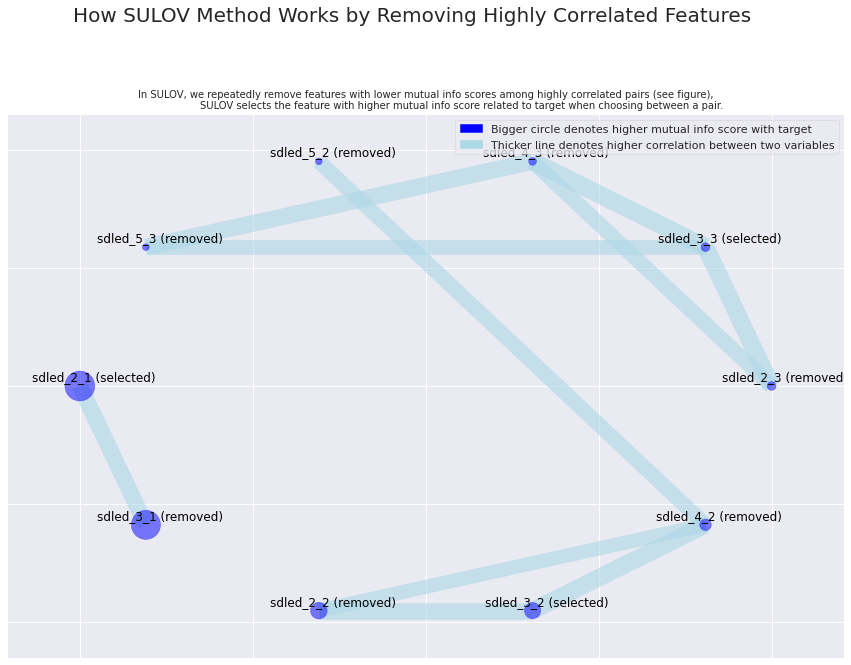

Splitting selected features into float and categorical (integer) variables:
    (9) float variables ...
    (34) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 43 
    Finding Important Features using Boosted Trees algorithm...
        using 43 variables...
        using 34 variables...
        using 25 variables...
        using 16 variables...
        using 7 variables...
Found 28 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  157644 , CV rows =  39411
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scal

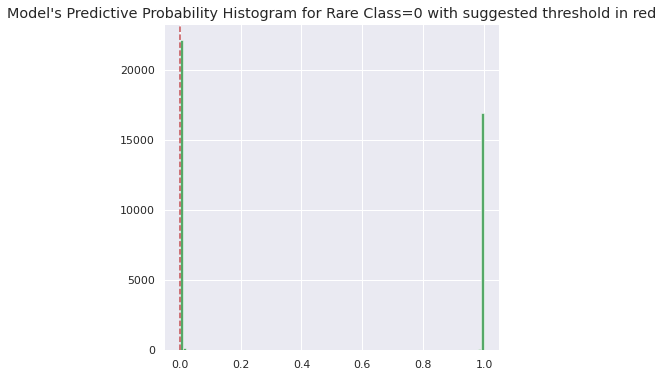

    Using threshold=0.5. However, 0.000 provides better F1=0.72 for rare class...
########################################################
SPE Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 9.6%
Balanced Accuracy = 100.00% with Threshold = 0.50
Confusion Matrix:
[[17045     0]
 [    0 22366]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17045
           1       1.00      1.00      1.00     22366

    accuracy                           1.00     39411
   macro avg       1.00      1.00      1.00     39411
weighted avg       1.00      1.00      1.00     39411

Balanced Accuracy = 11.11% with Threshold = 0.00
Confusion Matrix:
[[ 3786 13259]
 [22366     0]]
              precision    recall  f1-score   support

           0       0.14      0.22      0.18     17045
           1       0.00      0.00      0.00     22366

    accuracy                           0.10     39411
   macro avg       0.07      0.

Could not plot Cross Validation Parameters
    Time taken for this Target (in seconds) = 720
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
###########################################################################
#####   F I N A L I Z I N G   M O D E L   O N    F U L L   T R A I N  #####
###########################################################################
##################  Imbalanced Model Training  ############################
Using Self-Paced Ensemble Classifier to handle this Imbalanced dataset...
    This is not an Imbalanced data set. No need to use SMOTE but continuing...
    class_weights = [1.15611396 0.88103137]
    class_weighted_rows = {0: 98527, 1: 111832}
     Actual Training time taken in seconds = 1098
Training of models completed. Now starting predictions on test data...
    Making test Data predictions using modified Threshold = 0.000
    Calculating weighted average ense

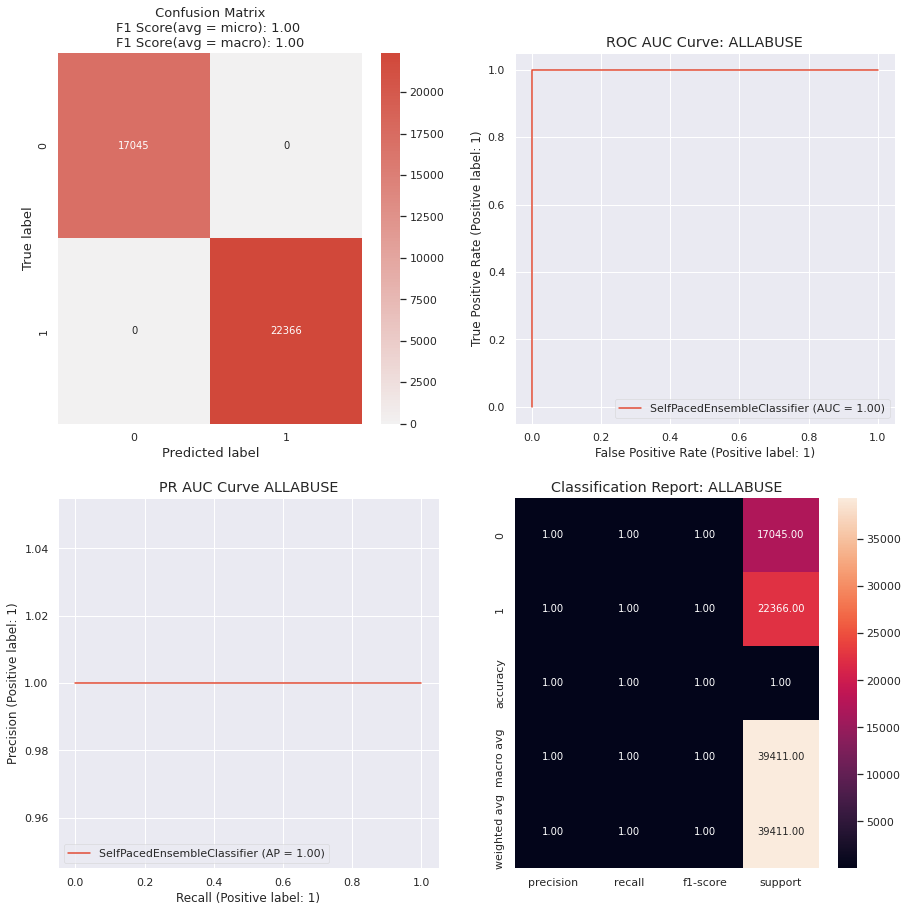

In [21]:
model, features, trainm, testm = Auto_ViML(train, target, test, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=True, 
                                    verbose=1)